In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib as mpl
import math
import numpy as np
import networkx as nx
import random as rn
import scipy
import igraph
print igraph.__version__
from matplotlib import colors
import scipy.io as sio

0.7.1


## Test Data Call From Matlab Fieldtrip

[[ 1.          0.99375889  0.74467521  0.51503281  0.71097165]
 [ 0.99375889  1.          0.67883594  0.43249468  0.63474669]
 [ 0.74467521  0.67883594  1.          0.92387448  0.98121825]
 [ 0.51503281  0.43249468  0.92387448  1.          0.92712511]
 [ 0.71097165  0.63474669  0.98121825  0.92712511  1.        ]]


C:\Users\owner\Anaconda\lib\site-packages\matplotlib\collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


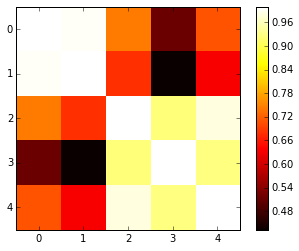

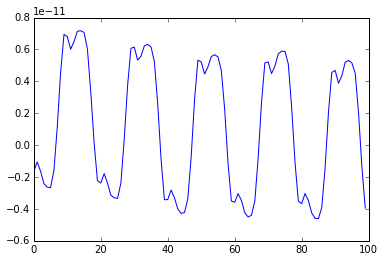

In [4]:
# Call the .mat file and assign it to a variable.
# The data file is interpreted as a dictionary in python containing a number of vector elements.
DAT = sio.loadmat('testpython.mat')
DAT

N = 100

CH1 = DAT['channel_1']
CH2 = DAT['channel_2']
CH3 = DAT['channel_3']
CH4 = DAT['channel_4']
CH5 = DAT['channel_5']

NDATA = []

for x in range(5):
    NDATA.append([])


# for i in range(1:5):
#     NDATA.append(DAT['channel_ '+str(i)])

#"d = $10^%s$"%(i)
    


DD = DAT.items()
# print DD[0]
# print
# print DD[0][1][0][0]
# print 
# print DD[1]
# print 
# print DD[1][1][0][1]

#print DAT['channel_1'][0][0]

for i in range(0,5):
    for j in range(N):
        NDATA[i].append(DD[i][1][0][j])
#print NDATA
coef = scipy.corrcoef(NDATA)
print coef

# cmap = colors.ListedColormap(['yellow', 'blue'])
# bounds=[0,1,1]
# norm = colors.BoundaryNorm(bounds, cmap.N)
# # tell imshow about color map so that only set colors are used
# img = plt.imshow(coef, interpolation='nearest', cmap=cmap, norm=norm)
# #origin='lower' - goes next to interpolation if needed.
# # make a color bar
# pyplot.colorbar(img, cmap=cmap, norm=norm, boundaries=bounds) #ticks=[0,1]
# pyplot.show()

# Plot of correlation coefficeint map
plasma = plt.get_cmap('hot')
cmap2 = mpl.colors.LinearSegmentedColormap.from_list('my_colormap', ['blue','red','black'], 256)
img2 = plt.imshow(coef,interpolation='nearest', cmap = plasma)#origin='lower'
plt.colorbar(img2,cmap=cmap2)
plt.show()

plt.plot(NDATA[1])

## Test of full data file of 102 sensors from MEG experiment called in from MATLAB

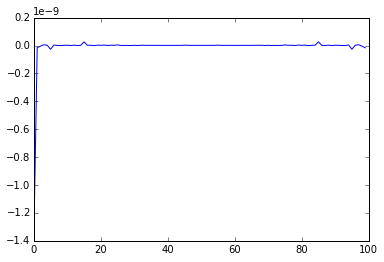

In [27]:
SEN = 10
k = 100

NEWDAT = sio.loadmat('ans.mat')
# print type(NEWDAT)
ad = NEWDAT.items()
# [header][row list][row][entry in row]

# print len(ad[1][1])
# print len(ad[1][1][0])
# print ad[1][1][0]

G_NODE = [[] for x in xrange(SEN)]

for i in range(SEN):
    for j in range(k):
        G_NODE[i].append(ad[1][1][i][j])


coef = scipy.corrcoef(G_NODE)
cov = np.cov(G_NODE)
invcov = np.linalg.inv(cov)

# print len(cov)
# print type(cov)
# print len(G_NODE)
# print type(G_NODE)
# print len(invcov)
# print type(invcov)


# Plot of correlation coefficeint map
# plasma = plt.get_cmap('hot')
# cmap2 = mpl.colors.LinearSegmentedColormap.from_list('my_colormap', ['blue','red','black'], 256)
# img2 = plt.imshow(coef,interpolation='nearest', cmap = plasma)#origin='lower'
# plt.colorbar(img2,cmap=cmap2)
# pp = 20
# for i in range(pp):
#     plt.plot(ad[1][1][i][range(0,k)])
# plt.plot(ad[1][1][1][range(0,k)])
# plt.plot(ad[1][1][10])
# plt.plot(ad[1][1][50])
XX = ad[1][1][1][range(0,100)]
plt.plot(np.fft.fft(XX))

## Test of the iteration and generation of connectivity plots

C:\Users\owner\Anaconda\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\Users\owner\Anaconda\lib\site-packages\numpy\core\_methods.py:68: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\Users\owner\Anaconda\lib\site-packages\numpy\lib\function_base.py:2487: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
C:\Users\owner\Anaconda\lib\site-packages\numpy\lib\function_base.py:2496: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)
C:\Users\owner\Anaconda\lib\site-packages\numpy\lib\function_base.py:2496: RuntimeWarning: invalid value encountered in multiply
  c *= 1. / np.float64(fact)


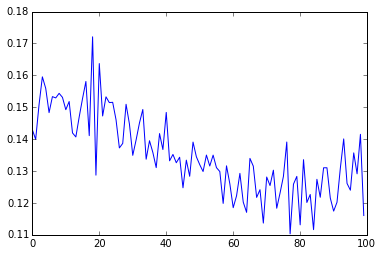

In [2]:
ITER = 100

SEN = 102
k = 10
mean_cor = []


NEWDAT = sio.loadmat('ans.mat')
ad = NEWDAT.items()
G_NODE = [[] for x in xrange(SEN)]
# [header][row list][row][entry in row]
count = 0

for i in range(ITER):
    for i in range(SEN):
        for j in range(count,(count+10)):
            G_NODE[i].append(ad[1][1][i][j])
    coef = scipy.corrcoef(G_NODE)
    #Plot of correlation coefficeint map
#     plasma = plt.get_cmap('hot')
#     cmap2 = mpl.colors.LinearSegmentedColormap.from_list('my_colormap', ['blue','red','black'], 256)
#     img2 = plt.imshow(coef,interpolation='nearest', cmap = plasma)
#     plt.colorbar(img2,cmap=cmap2)
#     plt.show()
    mean_cor.append(np.mean(coef))
    G_NODE = [[] for x in xrange(SEN)]
    coef = scipy.corrcoef(G_NODE)
    count = count + 10
plt.plot(mean_cor)    